# Árboles de Decisión (Python)
---
Los bosques aleatorios consisten simplemente en la generación de un número de árboles de decisión cuyos nodos adoptan condiciones diferentes para decidir sobre el mismo conjunto de datos de entrada. 

El resultado del bosque aleatorio será el promedio del resultado de los *n* árboles que conformen el bosque.

In [1]:
# 1. Importar librerías
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from beautifultable import BeautifulTable as BT

from sklearn.model_selection import train_test_split as separar
from sklearn.preprocessing import MinMaxScaler

In [2]:
# 2. Importar datos
datos = pd.read_csv('../Datos/4.1.Salarios2.csv')
datos.head(10)

,Posicion,Nivel,Salario
0,Analista,1,45000
1,Consultor Junior,2,50000
2,Consultor Senior,3,60000
3,Manager,4,80000
4,Manager General,5,110000
5,Manager Regional,6,150000
6,Socio,7,200000
7,Socio Senior,8,300000
8,Nivel-C,9,500000
9,CEO,10,1000000


In [3]:
# 3. Crear variable y respuesta
X = datos['Nivel'].values.reshape(-1,1)
y = datos['Salario'].values.reshape(-1,1)

In [ ]:
# 4. Separar en Entranamiento y Validación
'''
X_train, X_test, y_train, y_test = separar(X, y, test_size=0.3, random_state=0)
print('La forma de X_train es: ', X_train.shape)
print('La forma de y_train es: ', y_train.shape)
print('La forma de X_test es: ', X_test.shape)
print('La forma de y_test es: ', y_test.shape)
'''

In [ ]:
'''
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)
print('La forma de X_train es: ', X_train.shape)
print('La forma de y_train es: ', X_train.shape)
print('La forma de X_test es: ', X_test.shape)
print('La forma de y_test es: ', y_test.shape)
'''

In [4]:
# 5. Escalar los datos
escaladorX = MinMaxScaler()
X = escaladorX.fit_transform(X).reshape(-1,1)

escaladorY = MinMaxScaler()
y = escaladorY.fit_transform(y) # Si ponemos (-1,1) aquí, el SVR se quejará

/Users/pablorr10/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
# 6. Ajustar el Modelo
from sklearn.ensemble import RandomForestRegressor as Bosque
regresor = Bosque(n_estimators=10, random_state=0)
regresor.fit(X, y.reshape(-1,))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [6]:
# 7. Hacer las predicciones (predicciones -> y_pred)
y_fit = regresor.predict(X).reshape(-1,1) # Valores ajustados durante el entrenamiento
y_pred = regresor.predict(6.5).reshape(1,1)  # Valores resultantes con la nueva información

In [7]:
# 8. Desescalar para ver los valores reales
y = escaladorY.inverse_transform(y)
y_fit = escaladorY.inverse_transform(y_fit) # Desescalar
y_pred = escaladorY.inverse_transform(y_pred)
X = escaladorX.inverse_transform(X)

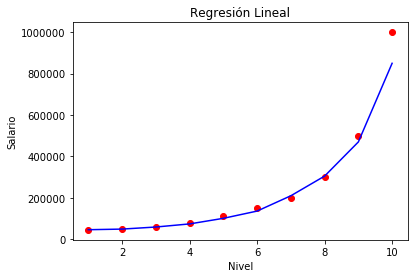

Para un nivel 6.5 cobraría  [[ 850000.]]


In [8]:
# 8. Echemos un vistazo a la pinta que tienen nuestros ajustes
plt.scatter(X, y, color = 'red')
plt.plot(X, y_fit, color = 'blue')
plt.title('Regresión Lineal')
plt.xlabel('Nivel')
plt.ylabel('Salario')
plt.show()
print('Para un nivel 6.5 cobraría ', y_pred)

In [9]:
# 9. Cálculo del error
from statsmodels.tools.eval_measures import rmse
RMSE = rmse(y, y_fit)
print('RMSE = ', RMSE)

RMSE =  [ 48827.2464921]


# Conclusión
---
Hemos visto en el tema anterior como los árboles de decisión os devolvían el resultado del nodo hoja resultante de cumplirse todas las condiciones en los nodos rama hasta él. El bosque está creando *n* árboles como este y promedia el resultado de los *n* nodos hoja resultantes.  
Tiene sentido además que no prediga de buena forma el último de los valores correspondiente al CEO ya que como vemos se sale del patrón.